Рассматривается дифференциальное уравнение:   
y"+a*y=2*u,  y(0)=1,  u(x)=sign(sin(x)),   
x изменяется от 0 до 4 с шагом h=0.25

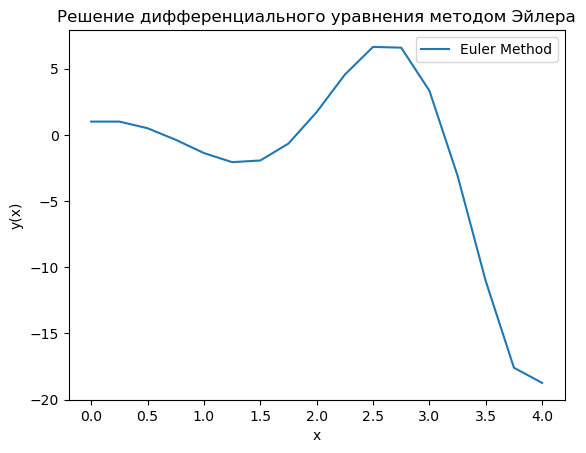

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def u(x):
    return np.sign(np.sin(x))

def euler_method(a, h, x_max):
    x_values = np.arange(0, x_max + h, h)
    y_values = np.zeros_like(x_values)
    y_prime_values = np.zeros_like(x_values)

    # Начальные условия
    y_values[0] = 1
    y_prime_values[0] = 0

    # Метод Эйлера
    for i in range(len(x_values) - 1):
        y_values[i+1] = y_values[i] + h * y_prime_values[i]
        y_prime_values[i+1] = y_prime_values[i] + h * (2 * u(x_values[i]) - a * y_values[i])

    return x_values, y_values

# Параметры
a_value = 8
h_value = 0.25
x_max_value = 4.0

# Решение уравнения методом Эйлера
x_result, y_result = euler_method(a_value, h_value, x_max_value)

plt.plot(x_result, y_result, label='Euler Method')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Решение дифференциального уравнения методом Эйлера')
plt.legend()
plt.show()


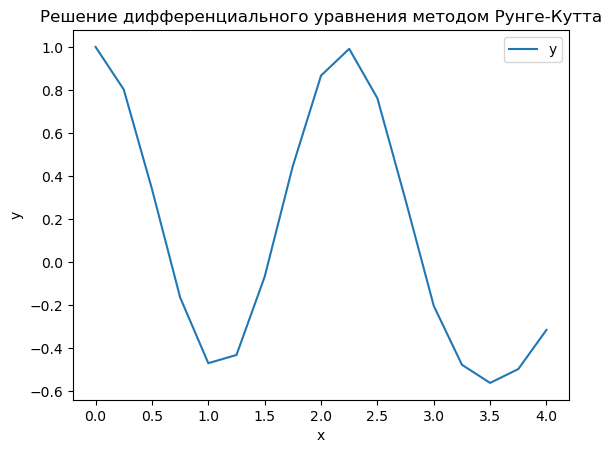

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def differential_equation(x, y, y_prime):
    a = 8  # ваш параметр 'a'
    u = np.sign(np.sin(x))
    return 2 * u - a * y

def runge_kutta(h, x, y, y_prime):
    k1 = h * y_prime
    l1 = h * differential_equation(x, y, y_prime)

    k2 = h * (y_prime + 0.5 * l1)
    l2 = h * differential_equation(x + 0.5 * h, y + 0.5 * k1, y_prime + 0.5 * l1)

    k3 = h * (y_prime + 0.5 * l2)
    l3 = h * differential_equation(x + 0.5 * h, y + 0.5 * k2, y_prime + 0.5 * l2)

    k4 = h * (y_prime + l3)
    l4 = h * differential_equation(x + h, y + k3, y_prime + l3)

    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    y_prime_next = y_prime + (l1 + 2 * l2 + 2 * l3 + l4) / 6

    return y_next, y_prime_next

x0 = 0
y0 = 1
y_prime0 = 0

h = 0.25
x_values = np.arange(x0, 4 + h, h)

y_values = np.zeros_like(x_values)
y_prime_values = np.zeros_like(x_values)

y_values[0] = y0
y_prime_values[0] = y_prime0

for i in range(1, len(x_values)):
    y_values[i], y_prime_values[i] = runge_kutta(h, x_values[i - 1], y_values[i - 1], y_prime_values[i - 1])

plt.plot(x_values, y_values, label='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Решение дифференциального уравнения методом Рунге-Кутта')
plt.legend()
plt.show()


Решить задачу Коши методом Эйлера, модифицированным методом Эйлера
и методом Рунге-Кутта на заданном отрезке:   
y' = x - 2*y   
y(-1)=1   
-1 <= x <= 2   
шаг h = 0.6

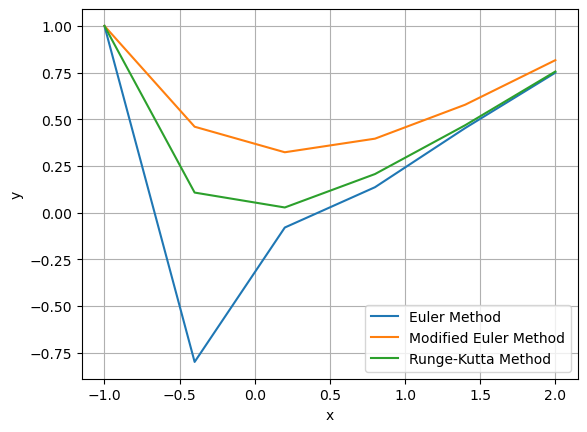

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x - 2 * y

def euler_method(x0, y0, h, xn):
    x_values = [x0]
    y_values = [y0]

    while x_values[-1] < xn:
        x = x_values[-1]
        y = y_values[-1]
        y_next = y + h * f(x, y)
        x_values.append(x + h)
        y_values.append(y_next)

    return x_values, y_values

def modified_euler_method(x0, y0, h, xn):
    x_values = [x0]
    y_values = [y0]

    while x_values[-1] < xn:
        x = x_values[-1]
        y = y_values[-1]
        k1 = f(x, y)
        k2 = f(x + h, y + h * k1)
        y_next = y + (h / 2) * (k1 + k2)
        x_values.append(x + h)
        y_values.append(y_next)

    return x_values, y_values

def runge_kutta_method(x0, y0, h, xn):
    x_values = [x0]
    y_values = [y0]

    while x_values[-1] < xn:
        x = x_values[-1]
        y = y_values[-1]
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)
        y_next = y + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_values.append(x + h)
        y_values.append(y_next)

    return x_values, y_values

# Заданные параметры
x0 = -1
y0 = 1
h = 0.6
xn = 2

# Решение методом Эйлера
x_euler, y_euler = euler_method(x0, y0, h, xn)

# Решение модифицированным методом Эйлера
x_mod_euler, y_mod_euler = modified_euler_method(x0, y0, h, xn)

# Решение методом Рунге-Кутта
x_rk, y_rk = runge_kutta_method(x0, y0, h, xn)

plt.plot(x_euler, y_euler, label='Euler Method')
plt.plot(x_mod_euler, y_mod_euler, label='Modified Euler Method')
plt.plot(x_rk, y_rk, label='Runge-Kutta Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Древние часы

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10124\4208010809.py:45: RuntimeWarning: invalid value encountered in sqrt
  h_values_torricelli = np.sqrt(2 * g * x_values)


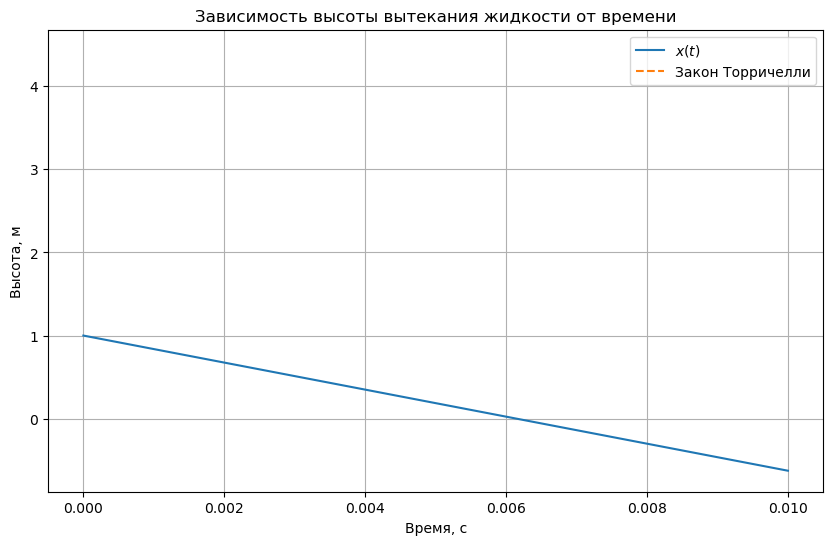

Время, когда сосуд будет пуст: 0.01 секунд


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Константы
g = 9.8  # Ускорение свободного падения, м/с^2
k = 0.6  # Коэффициент, зависящий от свойств жидкости
s = np.pi * (1/12)**2  # Площадь отверстия, м^2
h = 6  # Высота сосуда, м
D = 4  # Диаметр сосуда, м
r = 1/12  # Радиус отверстия, м

# Временной интервал
t_start = 0
t_end = 5
delta_t = 0.01  # Величина временного шага

# Начальное условие
x0 = 1

# Функция для вычисления S(x)
def S(x):
    return np.pi * (D**2 / 4 - x**2)

# Функция для вычисления производной dx/dt
def dx_dt(x):
    return -S(x) / (k * s * np.sqrt(2 * g * x))

# Метод Эйлера для решения дифференциального уравнения
def euler_method(x0, t_start, t_end, delta_t):
    t_values = np.arange(t_start, t_end, delta_t)
    x_values = np.zeros_like(t_values)
    x_values[0] = x0
    
    for i in range(1, len(t_values)):
        x_values[i] = x_values[i - 1] + delta_t * dx_dt(x_values[i - 1])
        if x_values[i] <= 0:
            break
    
    return t_values[:i+1], x_values[:i+1]

t_values, x_values = euler_method(x0, t_start, t_end, delta_t)

# Вычисление высоты вытекания жидкости через отверстие по закону Торричелли
h_values_torricelli = np.sqrt(2 * g * x_values)

plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='$x(t)$')
plt.plot(t_values, h_values_torricelli, label='Закон Торричелли', linestyle='--')
plt.xlabel('Время, с')
plt.ylabel('Высота, м')
plt.title('Зависимость высоты вытекания жидкости от времени')
plt.legend()
plt.grid(True)
plt.show()

time_empty = t_values[-1]
print(f"Время, когда сосуд будет пуст: {time_empty:.2f} секунд")
